In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as sms
import statsmodels.api as sm

# Creating csv for messages

In [2]:
os.listdir('text')

['Angrybonds', 'Angrybonds chat', 'Probonds', 'Probonds chat']

In [3]:
Angrybonds = pd.DataFrame()
proverka = 0
available = [i for i in os.listdir('text/'+'Angrybonds') if len(i.split('csv')) != 1]
for file in available:
    df = pd.read_csv('text/' + 'Angrybonds/' + file, sep = '|')
    del df['Unnamed: 0']
    df['time'] = df['time'].apply(lambda x: str(x)[:10])
    df.time = pd.to_datetime(df.time,yearfirst=False,format= '%d.%m.%Y')
    Angrybonds = pd.concat([Angrybonds,df], axis = 0)
    proverka+= df.shape[0]
Angrybonds.sort_index(inplace = True)
assert proverka == Angrybonds.shape[0]

In [4]:
Angrybonds_chat = pd.DataFrame()
proverka = 0
available = [i for i in os.listdir('text/'+'Angrybonds chat') if len(i.split('csv')) != 1]
for file in available:
    df = pd.read_csv('text/' + 'Angrybonds chat/' + file, sep = '|')
    del df['Unnamed: 0']
    df['time'] = df['time'].apply(lambda x: str(x)[:10])
    df.time = pd.to_datetime(df.time,yearfirst=False,format= '%d.%m.%Y')
    Angrybonds_chat = pd.concat([Angrybonds_chat,df], axis = 0)
    proverka+= df.shape[0]
Angrybonds_chat.sort_index(inplace = True)
assert proverka == Angrybonds_chat.shape[0]

In [5]:
Probonds = pd.DataFrame()
proverka = 0
available = [i for i in os.listdir('text/'+'Probonds') if len(i.split('csv')) != 1]
for file in available:
    df = pd.read_csv('text/' + 'Probonds/' + file, sep = '|')
    del df['Unnamed: 0']
    df['time'] = df['time'].apply(lambda x: str(x)[:10])
    df.time = pd.to_datetime(df.time,yearfirst=False,format= '%d.%m.%Y')
    Probonds = pd.concat([Probonds,df], axis = 0)
    proverka+= df.shape[0]
Probonds.sort_index(inplace = True)
assert proverka == Probonds.shape[0]

In [6]:
Probonds_chat = pd.DataFrame()
proverka = 0
available = [i for i in os.listdir('text/'+'Probonds chat') if len(i.split('csv')) != 1]
for file in available:
    df = pd.read_csv('text/' + 'Probonds chat/' + file, sep = '|')
    del df['Unnamed: 0']
    df['time'] = df['time'].apply(lambda x: str(x)[:10])
    df.time = pd.to_datetime(df.time,yearfirst=False,format= '%d.%m.%Y')
    Probonds_chat = pd.concat([Probonds_chat,df], axis = 0)
    proverka+= df.shape[0]
Probonds_chat.sort_index(inplace = True)
assert proverka == Probonds_chat.shape[0]

In [7]:
Probonds.sort_values('time')

,time,user,text
0,2018-08-02,PRObonds | Иволга Капитал,Всем привет Начинаем вести канал. И продолжаем...
1,2018-08-02,PRObonds | Иволга Капитал,"Это то, что мы должны получить."
3,2018-08-02,PRObonds | Иволга Капитал,И наиболее интересное вот как вел себя наш пор...
2,2018-08-02,PRObonds | Иволга Капитал,Состав портфеля на момент старта. Он и сейчас ...
5,2018-08-03,PRObonds | Иволга Капитал,http//forum.mfd.ru/forum/thread/id95633 Это ещ...
...,...,...,...
210,2020-05-14,PRObonds | Иволга Капитал,портфелиprobonds сделки легенда легион Мы прод...
211,2020-05-14,PRObonds | Иволга Капитал,Деньги и облигации. Реакция на кризис Мир на п...
212,2020-05-15,PRObonds | Иволга Капитал,"хроникикризиса макроэкономика ввп И мир, и Рос..."
213,2020-05-15,PRObonds | Иволга Капитал,долгиденьги Ожидания июньского понижения ключе...


# Подсчет упоминаний

In [8]:
dictionary = {'Роделен': ('роделен', 'rodelen'), "ТЕХНО Лизинг": ("техлиз", "техно лизинг", "техно"), "Пионер-Лизинг":\
              ("пионлиз", "пион")}
dictionary['Роделен']

('роделен', 'rodelen')

In [9]:
df = Probonds_chat
df['text'] = df['text'].apply(lambda x: str(x).lower())
for company in dictionary.keys():
    df[company] = df['text'].apply(lambda x: 1 if any(str(x).find(slovo) !=-1 for slovo in dictionary[company]) else 0)
    
df = Probonds
df['text'] = df['text'].apply(lambda x: str(x).lower())
for company in dictionary.keys():
    df[company] = df['text'].apply(lambda x: 1 if any(str(x).find(slovo) !=-1 for slovo in dictionary[company]) else 0)
    
df = Angrybonds
df['text'] = df['text'].apply(lambda x: str(x).lower())
for company in dictionary.keys():
    df[company] = df['text'].apply(lambda x: 1 if any(str(x).find(slovo) !=-1 for slovo in dictionary[company]) else 0)
    
df = Angrybonds_chat
df['text'] = df['text'].apply(lambda x: str(x).lower())
for company in dictionary.keys():
    df[company] = df['text'].apply(lambda x: 1 if any(str(x).find(slovo) !=-1 for slovo in dictionary[company]) else 0)

In [10]:
#реклама в группах
chatiki = [Probonds, Angrybonds]
new_var_list = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
i = 0
for company in dictionary.keys():    
    for chat in chatiki:
        ez = chat[[company, 'time']].groupby('time', as_index = False).sum()
        new_var_list[i] = pd.concat([new_var_list[i],ez], axis=0).groupby('time', as_index = False).sum()
    new_var_list[i].set_index('time', inplace = True)
    new_var_list[i] = new_var_list[i].apply(np.sign)
    i +=1
adv_rodelen, adv_texno, adv_pioner = new_var_list

for company in [adv_rodelen, adv_texno, adv_pioner]:
    company.columns = ['рекламные упоминания ' + company.columns[0]]


In [11]:
#Обсждение в чате
chatiki = [Probonds_chat, Angrybonds_chat]
new_var_list = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
i = 0
for company in dictionary.keys():    
    for chat in chatiki:
        ez = chat[[company, 'time']].groupby('time', as_index = False).sum()
        new_var_list[i] = pd.concat([new_var_list[i],ez], axis=0).groupby('time', as_index = False).sum()
    i +=1
rodelen, texno, pioner = new_var_list

In [18]:
rodelen

,time,Роделен
0,2018-02-08,0
1,2018-02-09,0
2,2018-02-10,0
3,2018-02-11,0
4,2018-02-12,0
...,...,...
811,2020-05-14,1
812,2020-05-15,1
813,2020-05-16,0
814,2020-05-17,0


Text(0.5, 1.0, 'Распределение упоминаний компании Роделен')

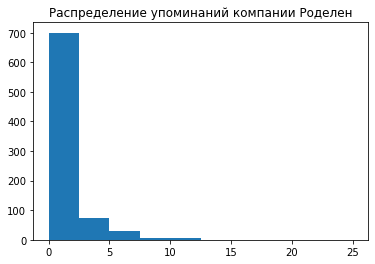

In [28]:
import seaborn as sns
plt.hist(rodelen['Роделен'].values)
plt.title('Распределение упоминаний компании Роделен')

In [22]:
pioner.columns

Index(['time', 'Пионер-Лизинг'], dtype='object')

Text(0.5, 1.0, 'Распределение упоминаний компании Пионер-Лизинг')

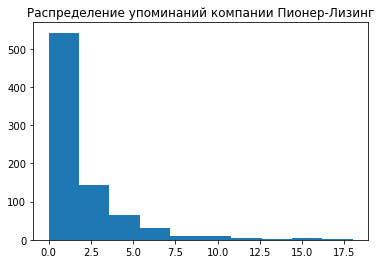

In [23]:
plt.hist(pioner['Пионер-Лизинг'].values)
plt.title('Распределение упоминаний компании Пионер-Лизинг')

In [25]:
texno.columns

Index(['time', 'ТЕХНО Лизинг'], dtype='object')

Text(0.5, 1.0, 'Распределение упоминаний компании ТЕХНО Лизинг')

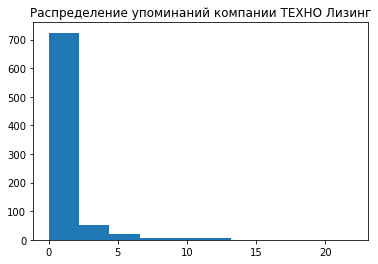

In [26]:
plt.hist(texno['ТЕХНО Лизинг'].values)
plt.title('Распределение упоминаний компании ТЕХНО Лизинг')

In [27]:
rodelen['Роделен'][rodelen['Роделен'].isin((1,2))]=1
rodelen['Роделен'][rodelen['Роделен'].isin((3,4))]=2
rodelen['Роделен'][rodelen['Роделен']>=5]=3

c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
rodelen['Роделен'].value_counts()

0    562
2    128
1     82
3     44
Name: Роделен, dtype: int64

In [29]:
texno['ТЕХНО Лизинг'][texno['ТЕХНО Лизинг'].isin((1,2))]=1
texno['ТЕХНО Лизинг'][texno['ТЕХНО Лизинг'].isin((3,4))]=2
texno['ТЕХНО Лизинг'][texno['ТЕХНО Лизинг']>=5]=3

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [30]:
texno['ТЕХНО Лизинг'].value_counts()

0    528
1    196
2     50
3     42
Name: ТЕХНО Лизинг, dtype: int64

In [31]:
pioner['Пионер-Лизинг'][pioner['Пионер-Лизинг'].isin((1,2))]=1
pioner['Пионер-Лизинг'][pioner['Пионер-Лизинг'].isin((3,4))]=2
pioner['Пионер-Лизинг'][pioner['Пионер-Лизинг']>=5]=3

c:\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [32]:
pioner['Пионер-Лизинг'].value_counts()

0    407
1    217
2    104
3     88
Name: Пионер-Лизинг, dtype: int64

In [33]:
#Proverka
#texno[texno.columns[1]].sum() == sum([sum(x[texno.columns[1]].values) for x in chatiki])

False

In [43]:
#Итоговые
rodelen_itog = pd.concat([rodelen.set_index('time'), adv_rodelen], axis = 1)
rodelen_itog.fillna(0, inplace = True)
#rodelen_itog.to_csv('rodelen_itog.csv')

texno_itog = pd.concat([texno.set_index('time'), adv_texno], axis = 1)
texno_itog.fillna(0, inplace = True)
#texno_itog.to_csv('rodelen_itog.csv')

pioner_itog = pd.concat([pioner.set_index('time'), adv_pioner], axis = 1)
pioner_itog.fillna(0, inplace = True)
#pioner_itog.to_csv('rodelen_itog.csv')

In [44]:
rodelen_itog.to_csv('rodelen_itog.csv')
texno_itog.to_csv('texno_itog.csv')
pioner_itog.to_csv('pioner_itog.csv')